# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score , GridSearchCV

%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

# Data preprocessing

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Drop unnecessary collumns
data =data.drop(['RowNumber','CustomerId','Surname'],axis=1) 

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**We need to encode data which are not numerical**

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lb_make = LabelEncoder()

In [8]:
data['Gender'] = lb_make.fit_transform(data['Gender'])
data['Geography'] = lb_make.fit_transform(data['Geography'])

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Correlation 

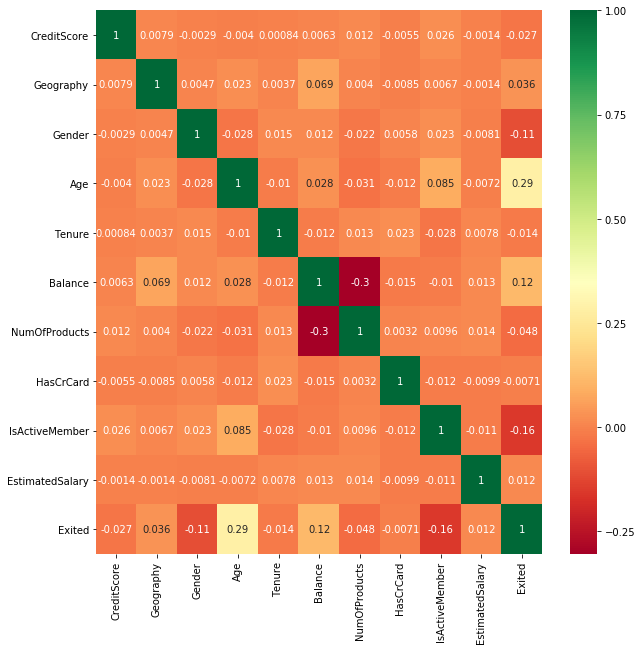

In [10]:
corrmat = data.corr() # Find Corr
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Spilit data**

In [11]:
X = data.drop('Exited',axis=1).values
y = data['Exited'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Scale data**

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Necessary Function**

In [15]:
# For model evolution
def model_evolution(y_test, y_pred):
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score : ",accuracy_score(y_test,y_pred),'\n')
    print("Classification Report : \n",classification_report(y_test, y_pred))

In [16]:
# create heatmap for confusion matrix
def heatmap_cm(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [17]:
# Grid search for finding best parameters for model
def grid_search(x,y,classifier,parameter,cv):
    grid_sr = GridSearchCV(estimator=classifier,param_grid=parameter,cv=cv,scoring='accuracy',n_jobs=-1)
    grid_sr.fit(x,y)
    print('Grid search best accuracy score : ',grid_sr.best_score_)
    print('Grid search best parameter : ',grid_sr.best_params_)

# Machine Learning Algorithm

The Target is the binary classification. So we need to use classifier.

In [18]:
def Model(X,y,algorithm,test):
    clf = algorithm.fit(X,y)
    pred = clf.predict(test)
    
    return clf, pred

**Logistic Regression**

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

In [20]:
classifier,y_pred = Model(X=X_train,y=y_train,algorithm=LogisticRegression(),test=X_test)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
model_evolution(y_test, y_pred)

Confusion Matrix : 
 [[2583   74]
 [ 527  116]]

Accuracy Score :  0.8178787878787879 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      2657
           1       0.61      0.18      0.28       643

    accuracy                           0.82      3300
   macro avg       0.72      0.58      0.59      3300
weighted avg       0.79      0.82      0.78      3300



In [22]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10).mean())


K-Fold Cross validation score :  0.80269245220969


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

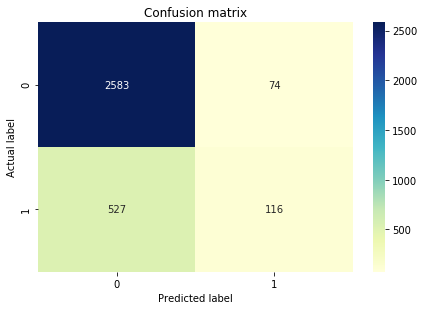

In [23]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,y_pred)))

* **Currectly classified : 2699**
* **Wrong classified : 601**

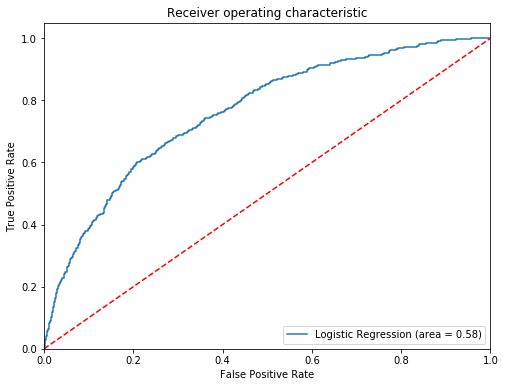

In [24]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Improve model using Grid search**

In [25]:
param_log = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [26]:
grid_search(x=X_train,y=y_train,classifier=classifier,parameter=param_log,cv=10)

Grid search best accuracy score :  0.8028358208955224
Grid search best parameter :  {'C': 1, 'penalty': 'l1'}


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**The model accuracy are almost same as before .. So, our model is not improved**

**SVM**

In [27]:
# import SVM algorithm
from sklearn.svm import SVC

In [28]:
clf_svc,pred_svc = Model(X=X_train,y=y_train,algorithm=SVC(probability=True),test=X_test)

In [29]:
model_evolution(y_test, pred_svc)

Confusion Matrix : 
 [[2607   50]
 [ 386  257]]

Accuracy Score :  0.8678787878787879 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2657
           1       0.84      0.40      0.54       643

    accuracy                           0.87      3300
   macro avg       0.85      0.69      0.73      3300
weighted avg       0.86      0.87      0.85      3300



In [30]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_svc,X=X_train,y=y_train,cv=10).mean())

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-p

K-Fold Cross validation score :  0.8514942719056604


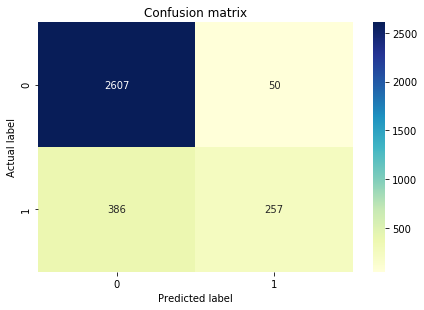

In [31]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_svc)))

* **Currectly classified : 2864**
* **Wrong classified : 436**

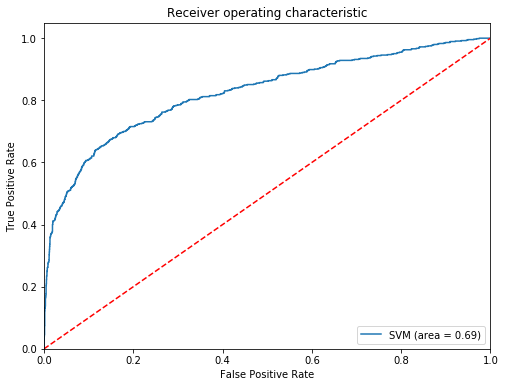

In [32]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_svc)
fpr, tpr, thresholds = roc_curve(y_test, clf_svc.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

SVM has given better result, better accuracy and better curve than Logistic Regression

In [33]:
param_svc ={'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.001, 0.10, 0.1, 10],
            'degree' : [0,3,6]}
            

In [34]:
grid_search(x=X_train,y=y_train,classifier=clf_svc,parameter=param_svc,cv=2)

Grid search best accuracy score :  0.8479104477611941
Grid search best parameter :  {'C': 10, 'degree': 3, 'kernel': 'poly'}


**The default model gives us better result**

**SGDClassifier**

In [35]:
from sklearn.linear_model import SGDClassifier 

In [44]:
clf_sgd,pred_sgd = Model(X= X_train,y=y_train,algorithm=SGDClassifier(loss= 'log'),test=X_test)

In [45]:
model_evolution(y_test,pred_sgd)

Confusion Matrix : 
 [[2542  115]
 [ 515  128]]

Accuracy Score :  0.8090909090909091 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.53      0.20      0.29       643

    accuracy                           0.81      3300
   macro avg       0.68      0.58      0.59      3300
weighted avg       0.77      0.81      0.77      3300



In [46]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_sgd,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.7947822142487059


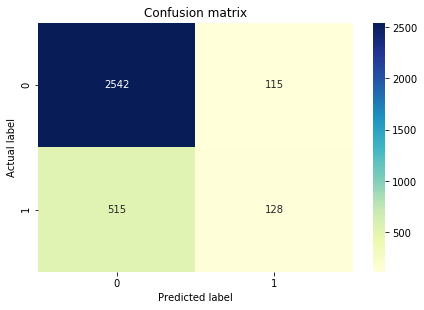

In [47]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_sgd)))

* **Currectly classified : 2670**
* **Wrong classified : 630**

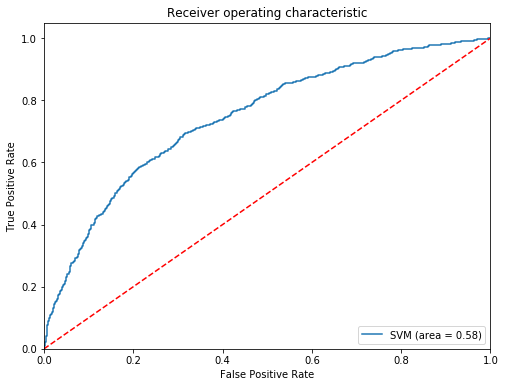

In [48]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_sgd)
fpr, tpr, thresholds = roc_curve(y_test, clf_sgd.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [41]:
param_sgd= {
    'alpha': [.0001, .001, .01, .1, 1, 1.1, 1.2, 1.3], # learning rate
    'max_iter': [500,1000,1500,2000,2500], # number of epochs
    'loss': [ 'hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_epsilon_insensitive'],
    'penalty': ['none', 'l2', 'l1','elasticnet']
    
}

In [42]:
grid_search(x=X_train,y=y_train,classifier=clf_sgd,parameter=param_sgd,cv=10)

Grid search best accuracy score :  0.8086567164179105
Grid search best parameter :  {'alpha': 1.1, 'loss': 'modified_huber', 'max_iter': 2000, 'penalty': 'none'}


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**With parameter tuning SGDmodel can be perform as Logistic Regression for this data set**

**Decision Tree**